https://stepik.org/lesson/1370116/step/6

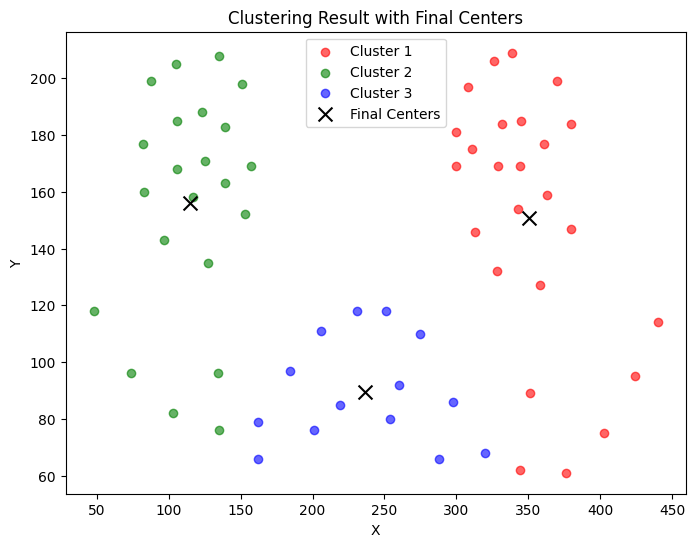

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

M = np.mean(data_x, axis=0)      # вычисление средних по каждой координате
D = np.var(data_x, axis=0)       # вычисление дисперсий по каждой координате
K = 3                       # число кластеров
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]        # начальные центры кластеров

ro = lambda x, m: np.mean(np.abs(x - m))

for _ in range(10):
    X = [[] for i in range(K)]                  # инициализация пустого двумерного списка для хранения объектов кластеров

    for x_vect in data_x:
        r = [ro(x_vect, m) for m in ma]         # вычисление расстояний для текущего образа до центров кластеров
        X[np.argmin(r)].append(x_vect)          # добавление образа к кластеру с ближайшим центром

    ma = [np.mean(xx, axis=0) for xx in X]

# Визуализация
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))

for i, xx in enumerate(X):
    xx = np.array(xx)
    if len(xx) > 0:
        plt.scatter(xx[:, 0], xx[:, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Отображение финальных центров
ma = np.array(ma)
plt.scatter(ma[:, 0], ma[:, 1], c='black', marker='x', s=100, label='Final Centers')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Clustering Result with Final Centers')
plt.show()